In [1]:
# Import all the necessary packages.
!pip install pysentiment2
!pip install textblob
import pandas as pd
import pysentiment2 as ps
from textblob import TextBlob
import numpy as np 
import matplotlib.pyplot as plt
import warnings

In [2]:
# Import the data set. We will use the more normalised TextBlob data set. 
speech_lm = pd.read_csv('speech_blob_1.csv')

In [3]:
# Initialize Loughran and McDonald analyzer
lm = ps.LM()

# Define a function to calculate sentiment with PySentiment2's Loughran-McDonald lexicon
def calculate_lm_sentiment(text):
    tokens = lm.tokenize(text)  # Tokenize the text
    score = lm.get_score(tokens)  # Get the sentiment score
    return score

In [4]:
# Apply the sentiment analysis function to the 'clean_text' column
# This will return a dictionary with various scores, including Polarity and Subjectivity
speech_lm['lm_sentiment'] = speech_lm['clean_text'].apply(calculate_lm_sentiment)

# Extracting the specific scores we are interested in from the sentiment dictionary
# For example, 'Polarity' and 'Subjectivity'
speech_lm['lm_polarity'] = speech_lm['lm_sentiment'].apply(lambda x: x['Polarity'])
speech_lm['lm_subjectivity'] = speech_lm['lm_sentiment'].apply(lambda x: x['Subjectivity'])

In [5]:
# We don't need the sentiment column
speech_lm = speech_lm.drop('lm_sentiment', axis=1)

In [6]:
# Viewing the dataframe
speech_lm

,reference,country,date,title,author,is_gov,text,Body,central_bank,year,language,clean_text,lm_polarity,lm_subjectivity
0,r980915a_BOE,United Kingdom,1998-09-15,Speech,George,False,"Thank you, Chairman. I'm actually very pleased...",BOE,Bank of England,1998,en,thank chairman actually pleased opportunity re...,-0.418182,0.132690
1,r981021b_BOE,United Kingdom,1998-10-21,Britain in Europe,George,False,It's a great pleasure to be here in the beauti...,BOE,Bank of England,1998,en,great pleasure beautiful city bruges honoured ...,-0.100529,0.127962
2,r981021a_BOE,United Kingdom,1998-10-21,Impact of the recent turbulence in internation...,King,True,Few industries have suffered more from volatil...,BOE,Bank of England,1998,en,industries suffered volatility british economy...,-0.372549,0.112335
3,r981101a_BOE,United Kingdom,1998-11-01,"Economic policy, with and without forecasts",Budd,False,My topic this evening is the use of forecasts ...,BOE,Bank of England,1998,en,topic evening use forecasts economic general u...,-0.142857,0.094541
4,r981101b_BOE,United Kingdom,1998-11-01,Inflation targeting in practice: the UK experi...,Vickers,False,"Six years ago this week, sterling left the exc...",BOE,Bank of England,1998,en,six years ago week sterling left exchange rate...,-0.406593,0.095840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1204,r221007a_BOE,United Kingdom,2022-10-07,"Shocks, inflation, and the policy response",Ramsden,False,Thank you very much for the invitation to spea...,BOE,Bank of England,2022,en,thank much invitation speak today one nine mem...,-0.525180,0.083988
1205,r221012a_BOE,United Kingdom,2022-10-12,Monetary policy: an anchor in challenging times,Pill,False,Huw Pill talks about how we will bring inflati...,BOE,Bank of England,2022,en,huw pill talks bring inflation acted stabilise...,-0.166667,0.084184
1206,r221015a_BOE,United Kingdom,2022-10-15,Monetary policy and financial stability interv...,Bailey,True,We are meeting in the most difficult of times....,BOE,Bank of England,2022,en,meeting difficult times saying start recognisi...,-0.600000,0.143939
1207,r221019a_BOE,United Kingdom,2022-10-19,"Governance of “Decentralised” Finance: Get up,...",Wilkins,False,"These are divided into seven categories, suffr...",BOE,Bank of England,2022,en,divided seven categories suffrage systems whos...,0.287234,0.083704


In [7]:
# Using the square-root rule to determine histogram bins
print(int(np.sqrt(len(speech_lm['lm_polarity']))))

34


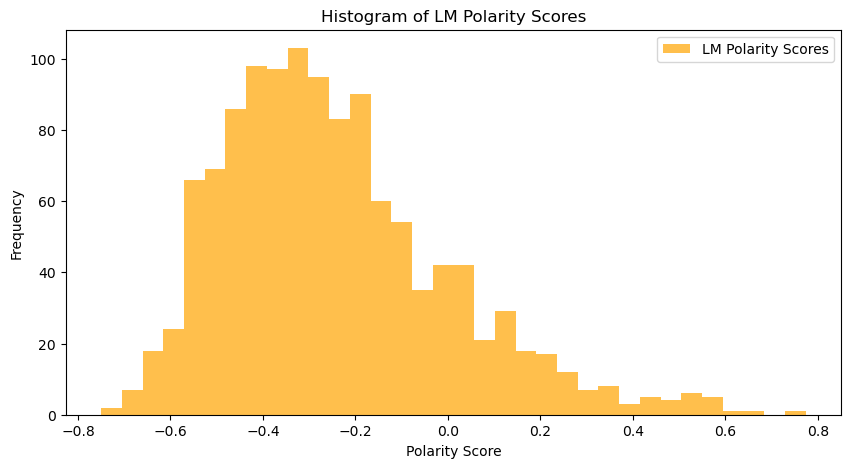

In [8]:
# Histgram for lm_polarity
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.hist(
    speech_lm['lm_polarity'],
    bins= 34,
    alpha=0.7,
    color='orange', 
    label='LM Polarity Scores'
)
plt.title('Histogram of LM Polarity Scores')
plt.xlabel('Polarity Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

- A healthy looking curve but a negatively skewed focus shows LM's weakness at appreciating the finer financial context. 

In [9]:
speech_lm['lm_polarity'].describe()

count    1209.000000
mean       -0.245673
std         0.243331
min        -0.750000
25%        -0.421538
50%        -0.287356
75%        -0.117117
max         0.773585
Name: lm_polarity, dtype: float64

- Mean: The mean sentiment score is -0.245673, which is somewhat negative, suggesting a general negative sentiment across the dataset.
- Standard Deviation: The standard deviation is relatively high at 0.243331, indicating variability in sentiment across different texts.
- Minimum: The most negative sentiment score is -0.750000, showing that there are texts with a strongly negative sentiment.
- 25th Percentile: A quarter of the data falls below -0.421538, further emphasizing that a significant portion of the dataset contains fairly negative sentiments.
- Median (50th Percentile): The median score is -0.287356, confirming the negative trend observed in the mean.
- 75th Percentile: Three-quarters of the data has a polarity score above -0.117117, indicating that the most negative sentiments are not shared by all texts in the dataset.
- Maximum: The highest sentiment score is 0.773585, revealing that there are also instances of positive sentiment, although these are less frequent given the negative mean score.

In [10]:
# Export as a .csv
# speech_LSE.to_csv('pysentiment2_scores.csv', index=False)